# A


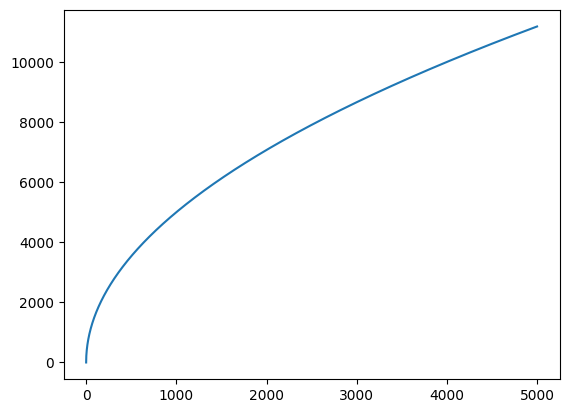

In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = 1
alpha = 1e-5
T0 = 300
beta = 1

t = np.linspace(0, 5000, 5001)
q = k * beta / 2 * (t / alpha) ** 0.5

plt.plot(t, q)
plt.show()

# B


C:\Users\Pablo\AppData\Local\Temp\ipykernel_22064\2605622728.py:21: RuntimeWarning: divide by zero encountered in divide
  + (time + position**2 / (2 * alpha)) * erfc(position / (2 * alpha_t))
C:\Users\Pablo\AppData\Local\Temp\ipykernel_22064\2605622728.py:21: RuntimeWarning: invalid value encountered in divide
  + (time + position**2 / (2 * alpha)) * erfc(position / (2 * alpha_t))
C:\Users\Pablo\AppData\Local\Temp\ipykernel_22064\2605622728.py:24: RuntimeWarning: divide by zero encountered in divide
  * np.exp(-((position / (2 * alpha_t)) ** 2))
C:\Users\Pablo\AppData\Local\Temp\ipykernel_22064\2605622728.py:24: RuntimeWarning: invalid value encountered in divide
  * np.exp(-((position / (2 * alpha_t)) ** 2))


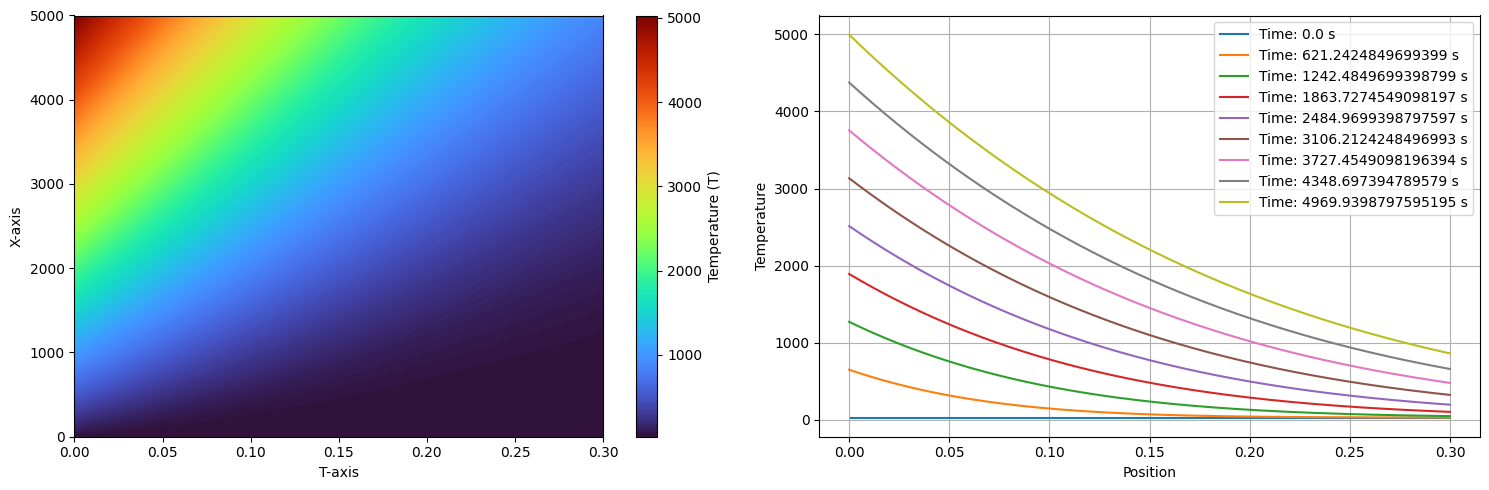

In [3]:
import scipy
from scipy.special import erfc
import numpy as np
import matplotlib.pyplot as plt

k = 1
alpha = 1e-5
beta = 1
T0 = 27

x = np.linspace(0, 0.3, 300)
t = np.linspace(0, 5000, 500)

domain_x, domain_t = np.meshgrid(x, t)


def T_func(position, time):
    alpha_t = (alpha * time) ** 0.5
    return (
        T0
        + (time + position**2 / (2 * alpha)) * erfc(position / (2 * alpha_t))
        - position
        * alpha_t
        * np.exp(-((position / (2 * alpha_t)) ** 2))
        / (alpha * np.pi**0.5)
    )


T = T_func(domain_x, domain_t)


figs, axs = plt.subplots(1, 2, figsize=(15, 5))
sc = axs[0].scatter(domain_x, domain_t, c=T, cmap="turbo", s=2)
axs[0].set_xlim((domain_x.min(), domain_x.max()))
axs[0].set_ylim((domain_t.min(), domain_t.max()))

axs[0].set_ylabel("X-axis")
axs[0].set_xlabel("T-axis")
cbar = figs.colorbar(sc)
cbar.set_label("Temperature (T)")

for timestep in t[:: len(t) // 8]:
    alpha_t = (alpha * timestep) ** 0.5
    axs[1].plot(x, T_func(x, timestep), label=f"Time: {timestep} s")
axs[1].set_ylabel("Temperature")
axs[1].set_xlabel("Position")
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()